<Figure size 432x288 with 0 Axes>

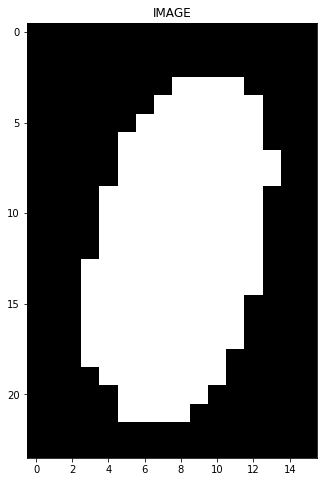

In [1]:
from handlers import files_handler
from handlers import image_handler
from handlers import label_handler
import pandas as pd
import numpy as np
import random
from skimage import io
from utils import utils
import matplotlib.pyplot as plt
from utils.consts import *


df = pd.read_csv(files_handler.get_csv_file_path())
df.head()


images = df.src_img_name.unique()
img_map = utils.get_random_images(images, 5)


masks_csv_data = df[df.src_img_name.isin(list(img_map.keys()))]
masks_csv_data.head()


mask_row = utils.pick_random_mask(masks_csv_data)
mask_img = utils.read_mask(mask_row)
utils.show_image(mask_img)

lbl_handler = label_handler.LabelHandler(40, 40, 3)


layer, change_other = lbl_handler.check_position(0,0, mask_img)
assert(layer == LAYER_1)
assert(change_other == False)


lbl_handler.place_cell(0,0,mask_img, 1, False)


layer, change_other = lbl_handler.check_position(4,4, mask_img)
assert(layer == LAYER_2)
assert(change_other == True)

In [2]:
lbl_handler.place_cell(4,4, mask_img, 2, True)
lbl_handler.place_cell(10,10, mask_img, 1, True)

In [3]:
layer, change_other = lbl_handler.check_position(0,0, mask_img)
assert(layer == INVALID_POS)
assert(change_other == False)

<Figure size 432x288 with 0 Axes>

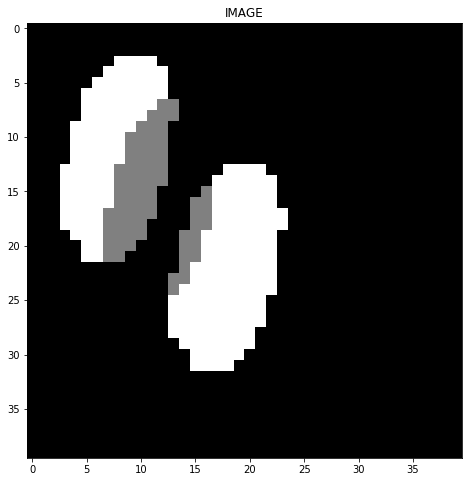

In [4]:
layer_1 = lbl_handler.label[1, :, :]
utils.show_image(layer_1)

<Figure size 432x288 with 0 Axes>

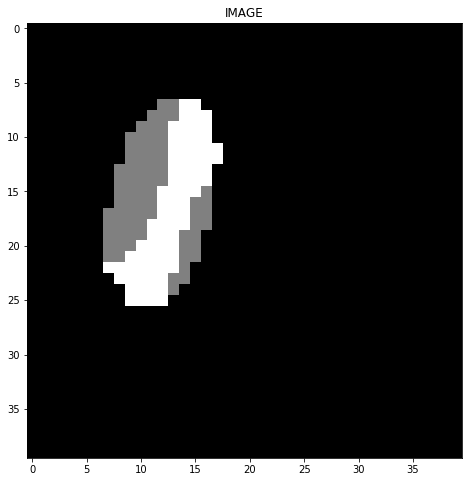

In [5]:
layer_2 = lbl_handler.label[2, :, :]
utils.show_image(layer_2)

oscarrrrrr


<Figure size 432x288 with 0 Axes>

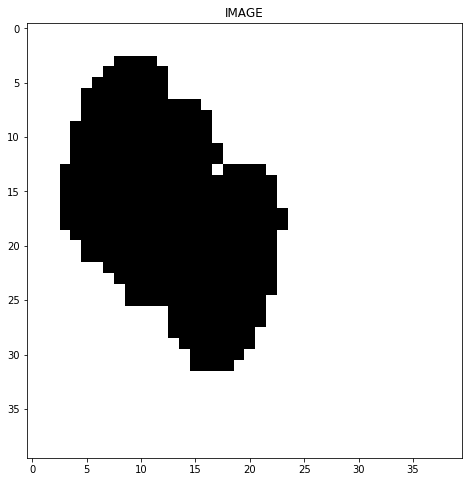

In [6]:
lbl_handler.save_label('')
background = lbl_handler.label[0, :, :]
utils.show_image(background)